In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('project4.csv')
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por A�,12300000,9.029610e+09,Sports,Natan por A�,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [5]:
df=df.drop(columns=['Abbreviation','Latitude','Longitude'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   channel_type                             965 non-null    object 
 9   video_views_rank                         994 non-null    float64
 10  country_rank                             879 non-n

In [7]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date                                 5
Gross tertiar

In [8]:
df.duplicated().sum()

np.int64(0)

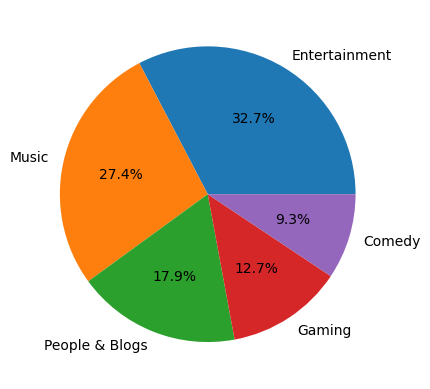

In [9]:
channel_count=df['category'].value_counts().head()
plt.pie(channel_count.values,labels=channel_count.index,autopct='%1.1f%%')
plt.show()

These contents are the top 5 contents that youtubers are streaming .Entertainment and music is most among that.

In [10]:
country_subscribers=df.groupby('Country')['subscribers'].sum().sort_values(ascending=False).head(15)
country_subscribers

Country
United States     7329500000
India             4310600000
Brazil            1221800000
United Kingdom     917400000
Mexico             626900000
Indonesia          534100000
South Korea        481700000
Russia             407200000
Thailand           386500000
Spain              385100000
Canada             363900000
Argentina          328500000
Colombia           264500000
Philippines        240100000
Japan              189100000
Name: subscribers, dtype: int64

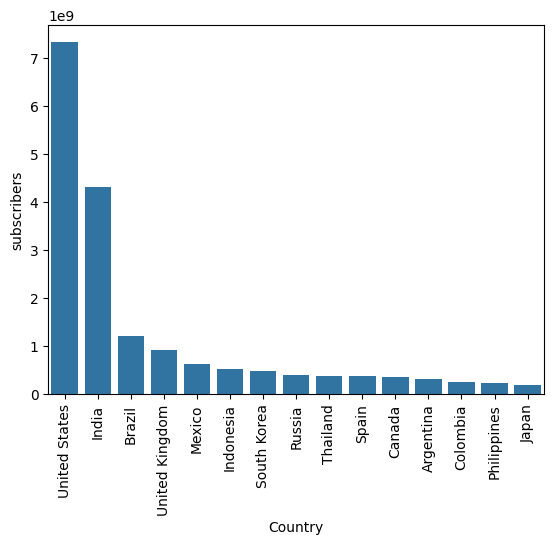

In [11]:
sns.barplot(country_subscribers)
plt.xticks(rotation=90)
plt.show()

Most of the subcribers in the channels are from US after that India

In [12]:
p=df.groupby('channel_type')['video_views_rank'].median().sort_values(ascending=False).head(10)
p

channel_type
Autos            3468229.0
Tech                2420.0
Games               1944.0
People              1868.0
Howto               1574.5
Nonprofit           1537.5
Sports              1186.0
Comedy              1033.0
Film                 880.0
Entertainment        796.0
Name: video_views_rank, dtype: float64

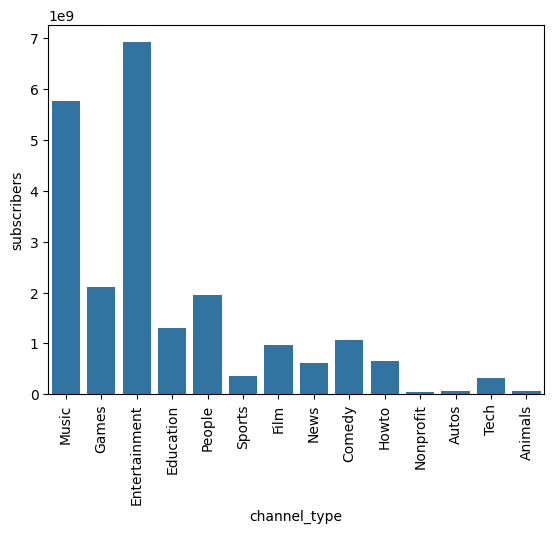

In [13]:
sns.barplot(df,x='channel_type',y='subscribers',estimator='sum',errorbar=None)
plt.xticks(rotation=90)
plt.show()

Entetainment channel type is having the large number of subscribers

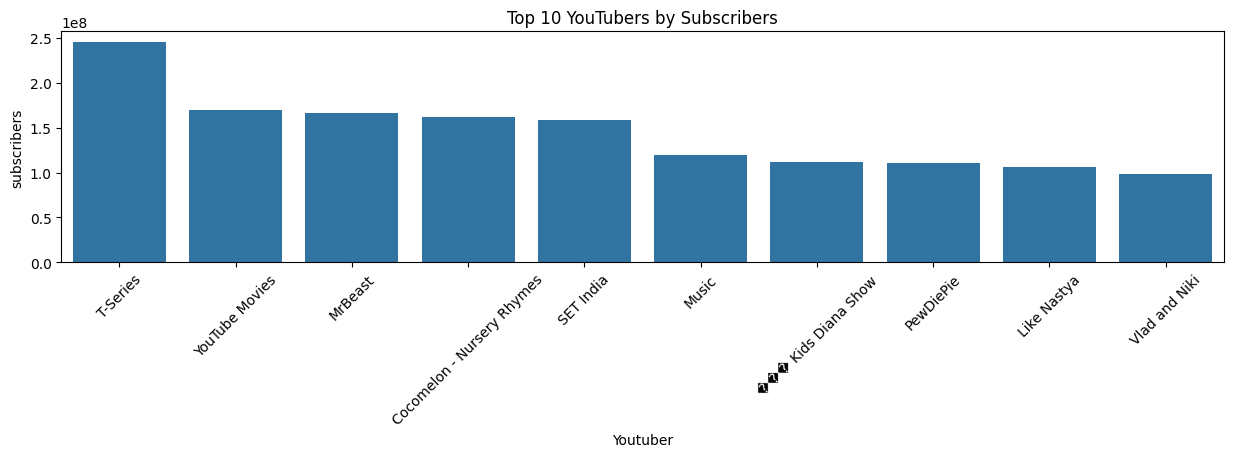

In [14]:
plt.figure(figsize=(15,3))
top10 = df.nlargest(10, 'subscribers')
sns.barplot(top10, x='Youtuber', y='subscribers')
plt.xticks(rotation=45)
plt.title('Top 10 YouTubers by Subscribers')
plt.show()

T-Series is having the most number of subscribers

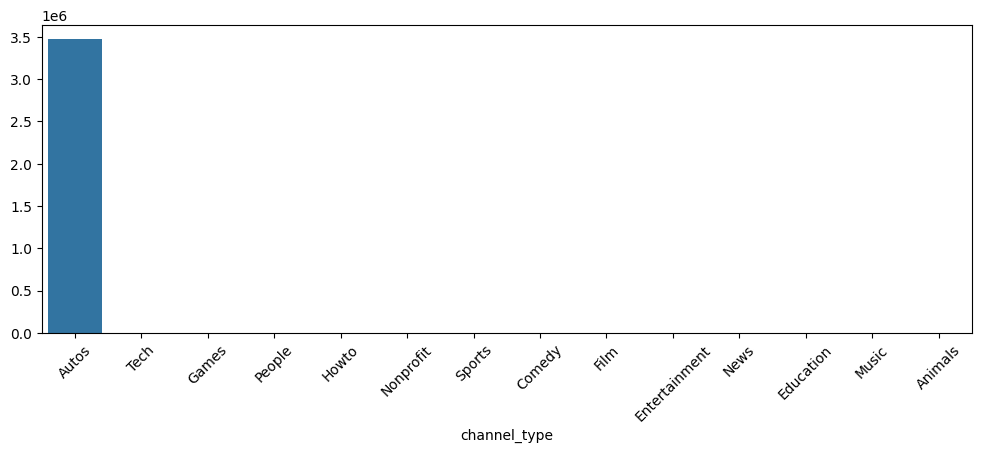

In [15]:
p = df.groupby('channel_type')['video_views_rank'].median().sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x=p.index, y=p.values,estimator='sum')
plt.xticks(rotation=45)
plt.show()

Autos Channel type is getting mohighestre number of views when compared to others

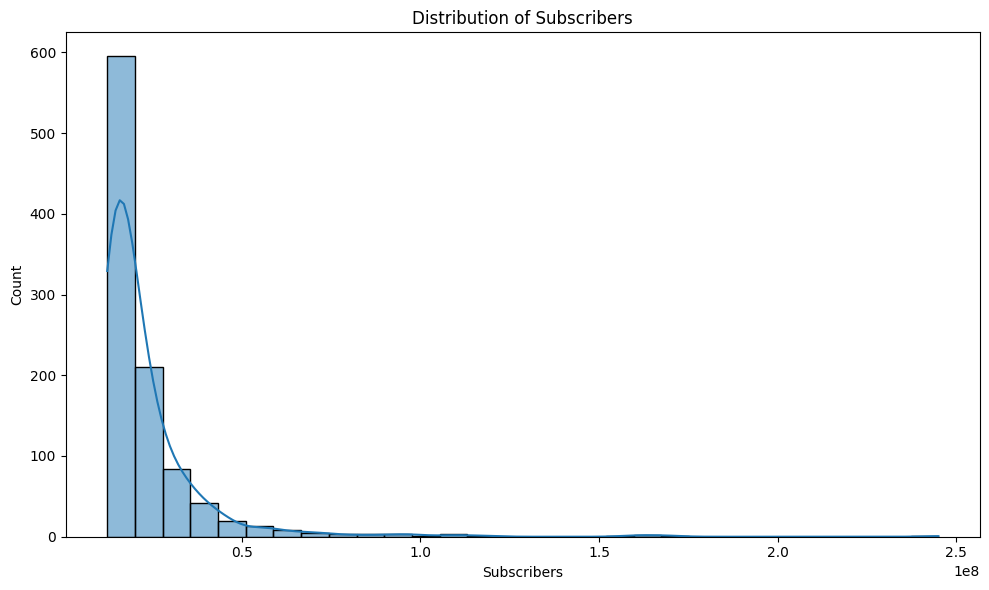

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['subscribers'], bins=30, kde=True)
plt.title("Distribution of Subscribers")
plt.xlabel("Subscribers")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


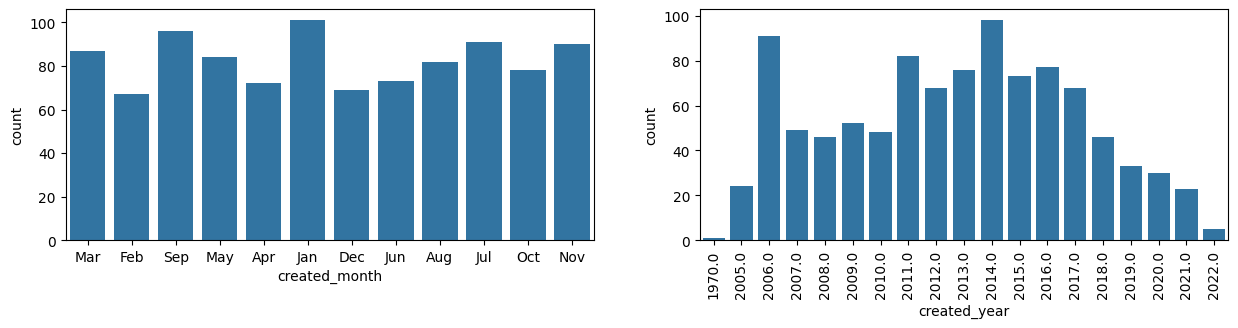

In [34]:
f,ax=plt.subplots(ncols=2,figsize=(15,3))
sns.countplot(df,x='created_year',ax=ax[1])
sns.countplot(df,x='created_month',ax=ax[0])
plt.xticks(rotation=90)
plt.show()

* Most of the peoples are starting the channel at the starting of the year 

* Also most of them started at 2014 compared to the other years 

* After 2014 new channel creation are becoming less on every year

In [66]:
top_youtuber_country=df.groupby('Country').agg({'Youtuber':'count'}).sort_values(by='Youtuber',ascending=False).head(15)
top_video_views_country=df.groupby('Country').agg({'video views':'sum'}).sort_values(by='video views',ascending=False).head(15)
top_subscriber_country=df.groupby('Country').agg({'subscribers':'sum'}).sort_values(by='subscribers',ascending=False).head(15)

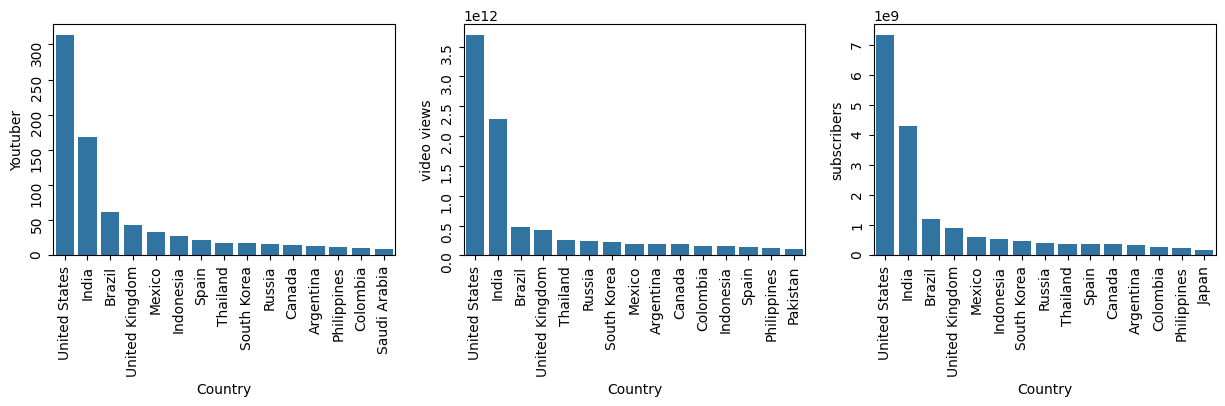

In [ ]:
a,f=plt.subplots(ncols=3,figsize=(15,3))
sns.barplot(top_youtuber_country,x='Country',y="Youtuber",ax=f[0])
sns.barplot(top_video_views_country,x='Country',y="video views",ax=f[1])
sns.barplot(top_subscriber_country,x='Country',y="subscribers",ax=f[2])
f[0].tick_params(rotation=90)
f[1].tick_params(rotation=90)
f[2].tick_params(rotation=90)
plt.show()

Youtubers in the country Us is having the large number of youtubers ,views and subscribers after that india then brazil

<Axes: xlabel='subscribers', ylabel='video views'>

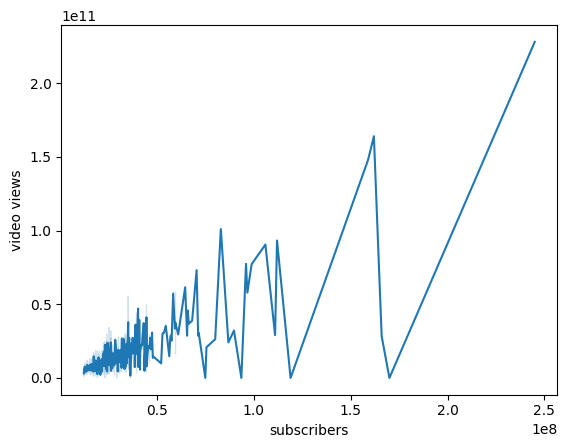

In [83]:
sns.lineplot(df,x='subscribers',y='video views',estimator='mean')

As a channel gains more subscribers, its total number of video views also increases. This makes perfect intuitive sense.

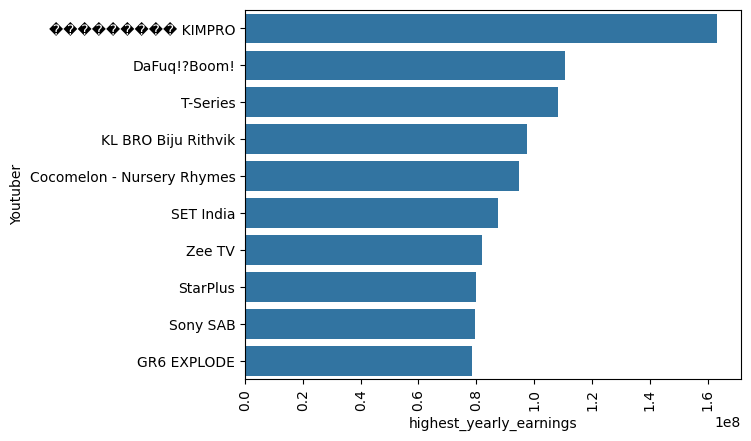

In [96]:
highest_earning_youtuber=df.sort_values(by='highest_yearly_earnings',ascending=False).head(10)
sns.barplot(highest_earning_youtuber,x='highest_yearly_earnings',y='Youtuber',estimator='sum')
plt.xticks(rotation=90)
plt.show()

Kimpro earning highest in a year is more than the others than others

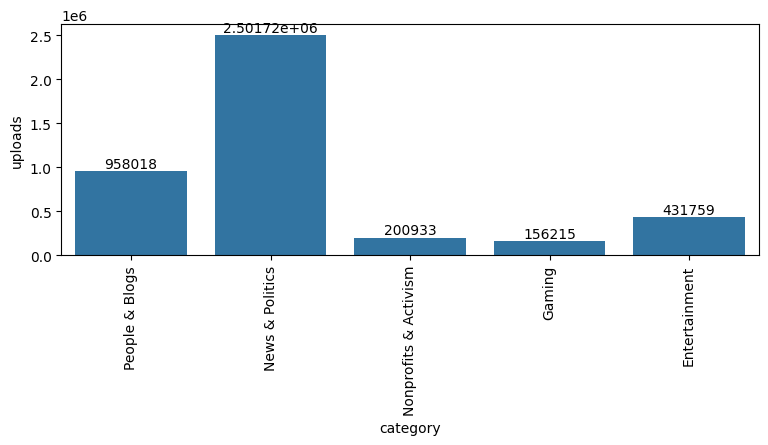

In [114]:
plt.figure(figsize=(9,3))
d=df.sort_values(by='uploads',ascending=False).head(20)
c=sns.barplot(d,x='category',y='uploads',estimator='sum',errorbar=None)
for  i in c.containers:
    c.bar_label(i)
plt.xticks(rotation=90)
plt.show()

News related videos are uploading more and gaming related videos are uploading less

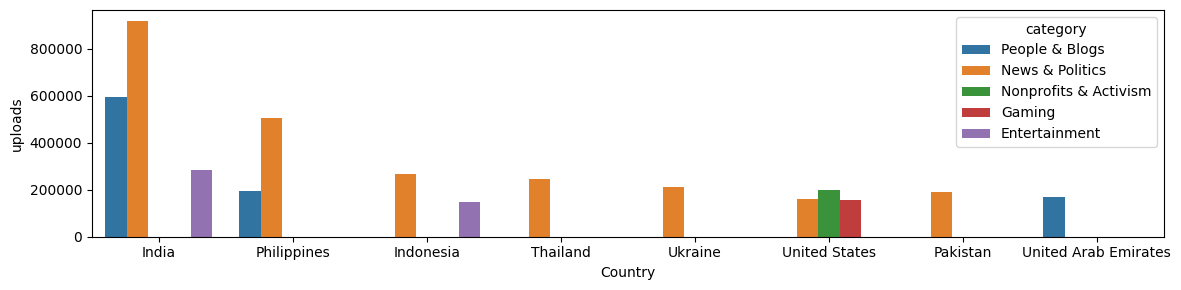

In [ ]:
plt.figure(figsize=(12,3))
d=df.sort_values(by='uploads',ascending=False).head(20)
c=sns.barplot(d,x='Country',y='uploads',estimator='sum',hue="category",errorbar=None)
plt.tight_layout()
plt.show()

Almost inn every country news related videos are uploading
Channels in US are mostly uploading NonProfits & Activism related video

                                                        Conclusion                                                                         

* Content Categories: Entertainment and Music dominate the platform, accounting for the largest share of top channels, followed by Education, Games, and Film & Animation. This indicates a strong viewer preference for leisure and educational content.

* Geographic Influence: The United States leads significantly in total subscribers, followed by India and Brazil. This highlights the global reach of YouTube, with Western and South Asian markets driving the majority of viewership.

* Channel Performance: Channels in the "Autos" category show the highest median video view ranks, suggesting niche but highly engaged audiences in specialized content areas.

                                                                                                                                    .